## **Pollution Trends in Pune** 

<h3>Exploratory Data Analysis (EDA) project!</h3>

<p>In this notebook, we will explore and analyze air pollution data from Pune using the dataset Pune_SmartCity_Test_Dataset.csv. This project is designed for newcomers to data analysis and aims to teach the fundamental steps in exploring real-world datasets.</p>

- Clean and prepare the dataset
- Visualize trends in pollution levels
- Identify patterns based on time and weekdays
- Derive basic insights from the data



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Loading Dataset**

In [2]:
# loading dataset
df = pd.read_csv('dataset/Pune_SmartCity_Test_Dataset.csv')
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [3]:
# preview data
df.head()

,NAME,HUMIDITY,LIGHT,NO_MAX,NO_MIN,NO2_MAX,NO2_MIN,OZONE_MAX,OZONE_MIN,PM10_MAX,...,CO2_MIN,SOUND,TEMPRATURE_MAX,TEMPRATURE_MIN,UV_MAX,UV_MIN,AIR_PRESSURE,LASTUPDATEDATETIME,Lattitude,Longitude
0,BopadiSquare_65,19.995,3762.914,0,0,59.0,54.0,15.0,0.0,22.0,...,401.0,66.133,41.0,24.0,5.3,0.2,0.933,13/05/19 12:16,18.559427,73.828656
1,Karve Statue Square_5,20.730,529.245,0,0,82.0,77.0,18.0,0.0,23.0,...,374.0,63.568,39.0,25.0,0.8,0.1,0.930,13/05/19 12:16,18.501727,73.813595
2,Lullanagar_Square_14,17.387,693.375,0,0,74.0,63.0,25.0,0.0,25.0,...,0.0,59.362,40.0,24.0,0.5,0.2,0.926,13/05/19 12:16,18.487306,73.885650
3,Hadapsar_Gadital_01,18.725,723.631,0,0,110.0,105.0,5.0,0.0,26.0,...,427.0,72.178,38.0,26.0,1.3,0.1,0.930,13/05/19 12:16,18.501834,73.941478
4,PMPML_Bus_Depot_Deccan_15,20.622,816.476,0,0,93.0,85.0,9.0,0.0,20.0,...,26.0,74.756,40.0,25.0,NaN,NaN,0.932,13/05/19 12:16,18.451716,73.856170


In [4]:
# check shape and info
print("Shape of dataset: ", df.shape)

df.info()

Shape of dataset:  (103205, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103205 entries, 0 to 103204
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   NAME                103205 non-null  object 
 1   HUMIDITY            98084 non-null   float64
 2   LIGHT               97133 non-null   float64
 3   NO_MAX              103205 non-null  int64  
 4   NO_MIN              103205 non-null  int64  
 5   NO2_MAX             102628 non-null  float64
 6   NO2_MIN             102628 non-null  float64
 7   OZONE_MAX           102597 non-null  float64
 8   OZONE_MIN           102597 non-null  float64
 9   PM10_MAX            99972 non-null   float64
 10  PM10_MIN            99972 non-null   float64
 11  PM2_MAX             99972 non-null   float64
 12  PM2_MIN             99972 non-null   float64
 13  SO2_MAX             102368 non-null  float64
 14  SO2_MIN             102368 non-null  float64
 15  CO

In [5]:
# Describing statistical values
df.describe()

,HUMIDITY,LIGHT,NO_MAX,NO_MIN,NO2_MAX,NO2_MIN,OZONE_MAX,OZONE_MIN,PM10_MAX,PM10_MIN,...,CO2_MAX,CO2_MIN,SOUND,TEMPRATURE_MAX,TEMPRATURE_MIN,UV_MAX,UV_MIN,AIR_PRESSURE,Lattitude,Longitude
count,98084.000000,97133.000000,103205.0,103205.0,102628.000000,102628.000000,102597.000000,102597.000000,99972.000000,99972.000000,...,101640.000000,101640.000000,9.808500e+04,98144.000000,98144.000000,90687.000000,90687.000000,98085.000000,103205.000000,103205.000000
mean,63.130559,1894.563277,0.0,0.0,72.677184,62.799830,16.646715,4.961899,19.004841,14.559357,...,217.621517,137.317011,1.535118e+02,33.920219,24.910560,1.093322,0.086700,0.930735,18.502812,73.849098
std,21.787184,5315.903216,0.0,0.0,37.689305,33.607416,28.367278,20.427678,12.492682,10.961672,...,238.833860,176.908786,1.294800e+04,5.264997,2.046729,1.487220,0.098301,0.021908,0.027027,0.043198
min,10.166000,0.094000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.620900e+01,23.000000,20.000000,0.000000,0.000000,0.763000,18.451716,73.792927
25%,48.056000,2.243000,0.0,0.0,47.000000,37.000000,0.000000,0.000000,8.000000,5.000000,...,29.000000,0.000000,6.482400e+01,29.000000,24.000000,0.000000,0.000000,0.928000,18.487306,73.824393
50%,68.196000,123.227000,0.0,0.0,77.000000,64.000000,6.000000,0.000000,18.000000,13.000000,...,127.000000,29.000000,7.089400e+01,34.000000,25.000000,0.400000,0.100000,0.931000,18.501834,73.828656
75%,81.099250,1879.022000,0.0,0.0,96.000000,87.000000,23.000000,0.000000,29.000000,23.000000,...,418.000000,296.000000,7.610800e+01,39.000000,26.000000,1.700000,0.100000,0.933000,18.525066,73.858092
max,97.359000,64811.321000,0.0,0.0,316.000000,315.000000,335.000000,335.000000,54.000000,48.000000,...,1338.000000,919.000000,2.027663e+06,46.000000,44.000000,6.600000,1.300000,1.349000,18.559427,73.941478


### **Data Cleaning**

In [8]:
# checking null values

df.isna().sum()

NAME                      0
HUMIDITY               5121
LIGHT                  6072
NO_MAX                    0
NO_MIN                    0
NO2_MAX                 577
NO2_MIN                 577
OZONE_MAX               608
OZONE_MIN               608
PM10_MAX               3233
PM10_MIN               3233
PM2_MAX                3233
PM2_MIN                3233
SO2_MAX                 837
SO2_MIN                 837
CO_MAX                  608
CO_MIN                  608
CO2_MAX                1565
CO2_MIN                1565
SOUND                  5120
TEMPRATURE_MAX         5061
TEMPRATURE_MIN         5061
UV_MAX                12518
UV_MIN                12518
AIR_PRESSURE           5120
LASTUPDATEDATETIME        0
Lattitude                 0
Longitude                 0
dtype: int64

In [9]:
# Drop rows with all null values
df.dropna(how="all", inplace=True)

# filling missing values with forward fill
df.fillna(method="ffill", inplace=True)

df.isnull().sum()

C:\Users\Acer\AppData\Local\Temp\ipykernel_16848\2796669444.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


NAME                  0
HUMIDITY              0
LIGHT                 0
NO_MAX                0
NO_MIN                0
NO2_MAX               0
NO2_MIN               0
OZONE_MAX             0
OZONE_MIN             0
PM10_MAX              0
PM10_MIN              0
PM2_MAX               0
PM2_MIN               0
SO2_MAX               0
SO2_MIN               0
CO_MAX                0
CO_MIN                0
CO2_MAX               0
CO2_MIN               0
SOUND                 0
TEMPRATURE_MAX        0
TEMPRATURE_MIN        0
UV_MAX                0
UV_MIN                0
AIR_PRESSURE          0
LASTUPDATEDATETIME    0
Lattitude             0
Longitude             0
dtype: int64

In [10]:
# rename columns
df.rename(columns=lambda x: x.strip().replace(" ", "_").lower(), inplace=True)
df.head()

,name,humidity,light,no_max,no_min,no2_max,no2_min,ozone_max,ozone_min,pm10_max,...,co2_min,sound,temprature_max,temprature_min,uv_max,uv_min,air_pressure,lastupdatedatetime,lattitude,longitude
0,BopadiSquare_65,19.995,3762.914,0,0,59.0,54.0,15.0,0.0,22.0,...,401.0,66.133,41.0,24.0,5.3,0.2,0.933,13/05/19 12:16,18.559427,73.828656
1,Karve Statue Square_5,20.730,529.245,0,0,82.0,77.0,18.0,0.0,23.0,...,374.0,63.568,39.0,25.0,0.8,0.1,0.930,13/05/19 12:16,18.501727,73.813595
2,Lullanagar_Square_14,17.387,693.375,0,0,74.0,63.0,25.0,0.0,25.0,...,0.0,59.362,40.0,24.0,0.5,0.2,0.926,13/05/19 12:16,18.487306,73.885650
3,Hadapsar_Gadital_01,18.725,723.631,0,0,110.0,105.0,5.0,0.0,26.0,...,427.0,72.178,38.0,26.0,1.3,0.1,0.930,13/05/19 12:16,18.501834,73.941478
4,PMPML_Bus_Depot_Deccan_15,20.622,816.476,0,0,93.0,85.0,9.0,0.0,20.0,...,26.0,74.756,40.0,25.0,1.3,0.1,0.932,13/05/19 12:16,18.451716,73.856170


In [11]:
# converting "timestamp" column to datetime format
df["lastupdatedatetime"] = pd.to_datetime(df["lastupdatedatetime"])

df.dtypes

C:\Users\Acer\AppData\Local\Temp\ipykernel_16848\2145299332.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["lastupdatedatetime"] = pd.to_datetime(df["lastupdatedatetime"])


name                          object
humidity                     float64
light                        float64
no_max                         int64
no_min                         int64
no2_max                      float64
no2_min                      float64
ozone_max                    float64
ozone_min                    float64
pm10_max                     float64
pm10_min                     float64
pm2_max                      float64
pm2_min                      float64
so2_max                      float64
so2_min                      float64
co_max                       float64
co_min                       float64
co2_max                      float64
co2_min                      float64
sound                        float64
temprature_max               float64
temprature_min               float64
uv_max                       float64
uv_min                       float64
air_pressure                 float64
lastupdatedatetime    datetime64[ns]
lattitude                    float64
l

In [12]:
# Extract Hour and Weekday
df["hour"] = df["lastupdatedatetime"].dt.hour
df["weekday"] = df["lastupdatedatetime"].dt.day_name()

df[['lastupdatedatetime', 'hour', 'weekday']].head()

,lastupdatedatetime,hour,weekday
0,2019-05-13 12:16:00,12,Monday
1,2019-05-13 12:16:00,12,Monday
2,2019-05-13 12:16:00,12,Monday
3,2019-05-13 12:16:00,12,Monday
4,2019-05-13 12:16:00,12,Monday


In [13]:
df.head(1)

,name,humidity,light,no_max,no_min,no2_max,no2_min,ozone_max,ozone_min,pm10_max,...,temprature_max,temprature_min,uv_max,uv_min,air_pressure,lastupdatedatetime,lattitude,longitude,hour,weekday
0,BopadiSquare_65,19.995,3762.914,0,0,59.0,54.0,15.0,0.0,22.0,...,41.0,24.0,5.3,0.2,0.933,2019-05-13 12:16:00,18.559427,73.828656,12,Monday


In [14]:
# Selecting pollution-relevant columns and rename
pollution_df = df.rename(columns={
    'co_max': 'co',
    'co2_max': 'co2',
    'no2_max': 'no2',
    'so2_max': 'so2',
    'pm10_max': 'pm10',
    'pm2_max': 'pm2_5',
    'sound': 'sound',
    'uv_max': 'uv'
})

pollution_cols = ['co', 'co2', 'no2', 'so2', 'pm10', 'pm2_5', 'sound', 'uv']
pollution_df = pollution_df[pollution_cols + ['hour', 'weekday']]
pollution_df.head()


,co,co2,no2,so2,pm10,pm2_5,sound,uv,hour,weekday
0,154.0,448.0,59.0,5.0,22.0,18.0,66.133,5.3,12,Monday
1,124.0,441.0,82.0,4.0,23.0,19.0,63.568,0.8,12,Monday
2,103.0,33.0,74.0,3.0,25.0,20.0,59.362,0.5,12,Monday
3,128.0,482.0,110.0,6.0,26.0,21.0,72.178,1.3,12,Monday
4,112.0,77.0,93.0,5.0,20.0,17.0,74.756,1.3,12,Monday


### **Visualise Dataset**

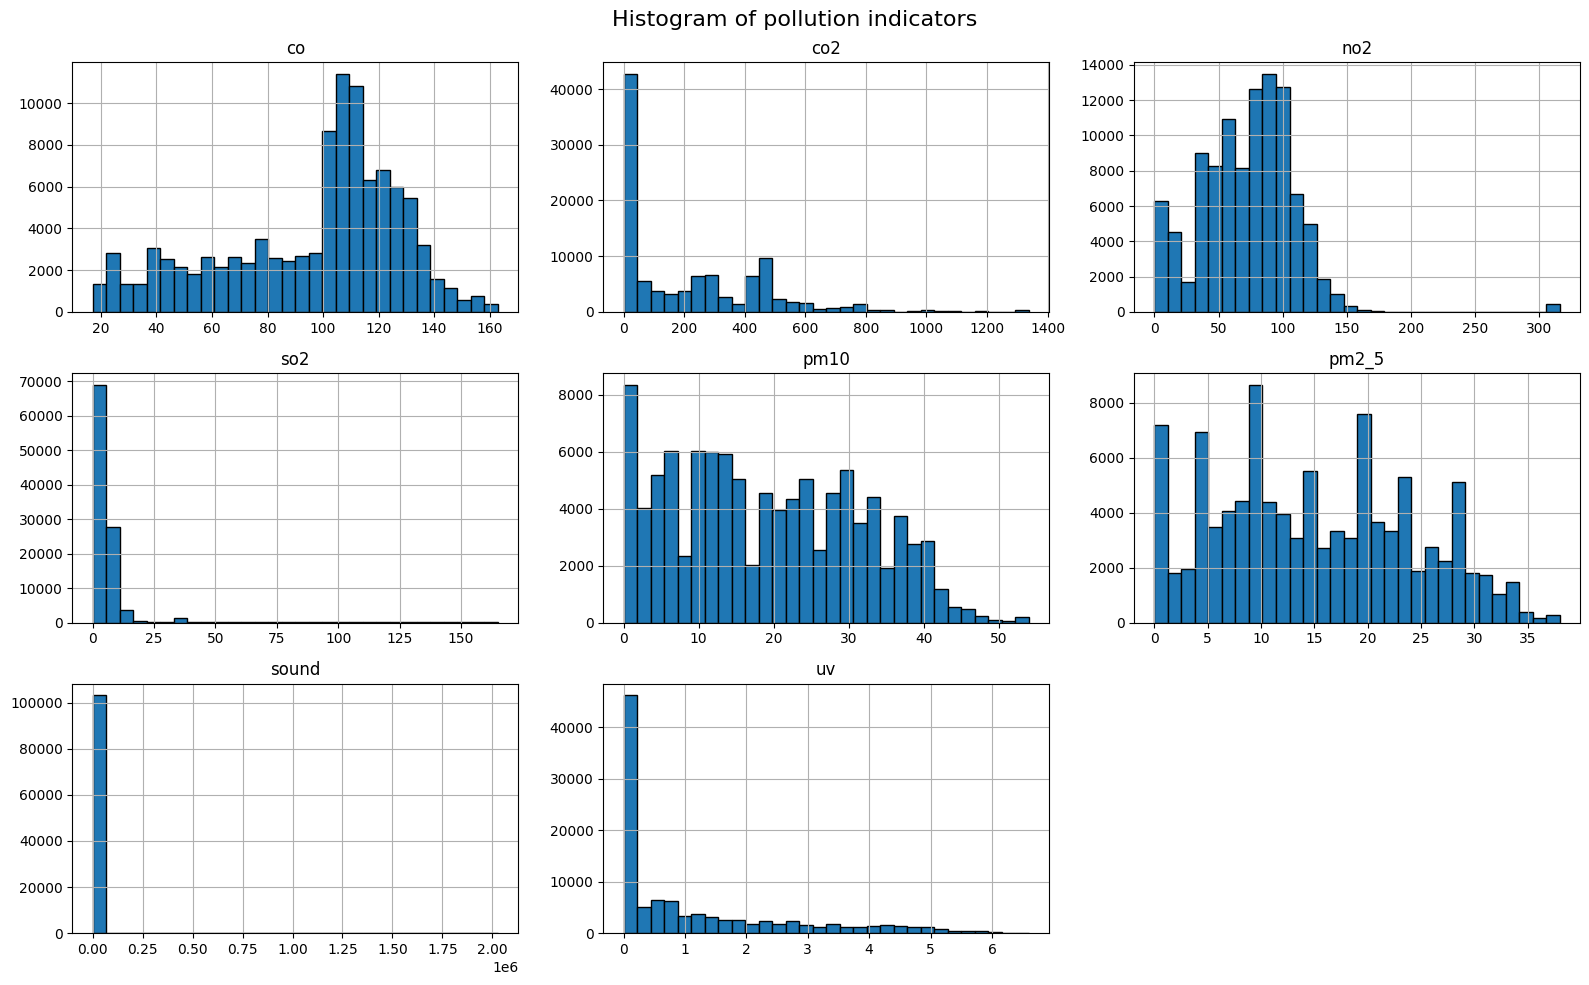

In [15]:
# Plotting Histograms

pollution_df[pollution_cols].hist(bins=30, figsize=(16,10), edgecolor='black')
plt.suptitle("Histogram of pollution indicators", fontsize = 16)
plt.tight_layout()
plt.show()

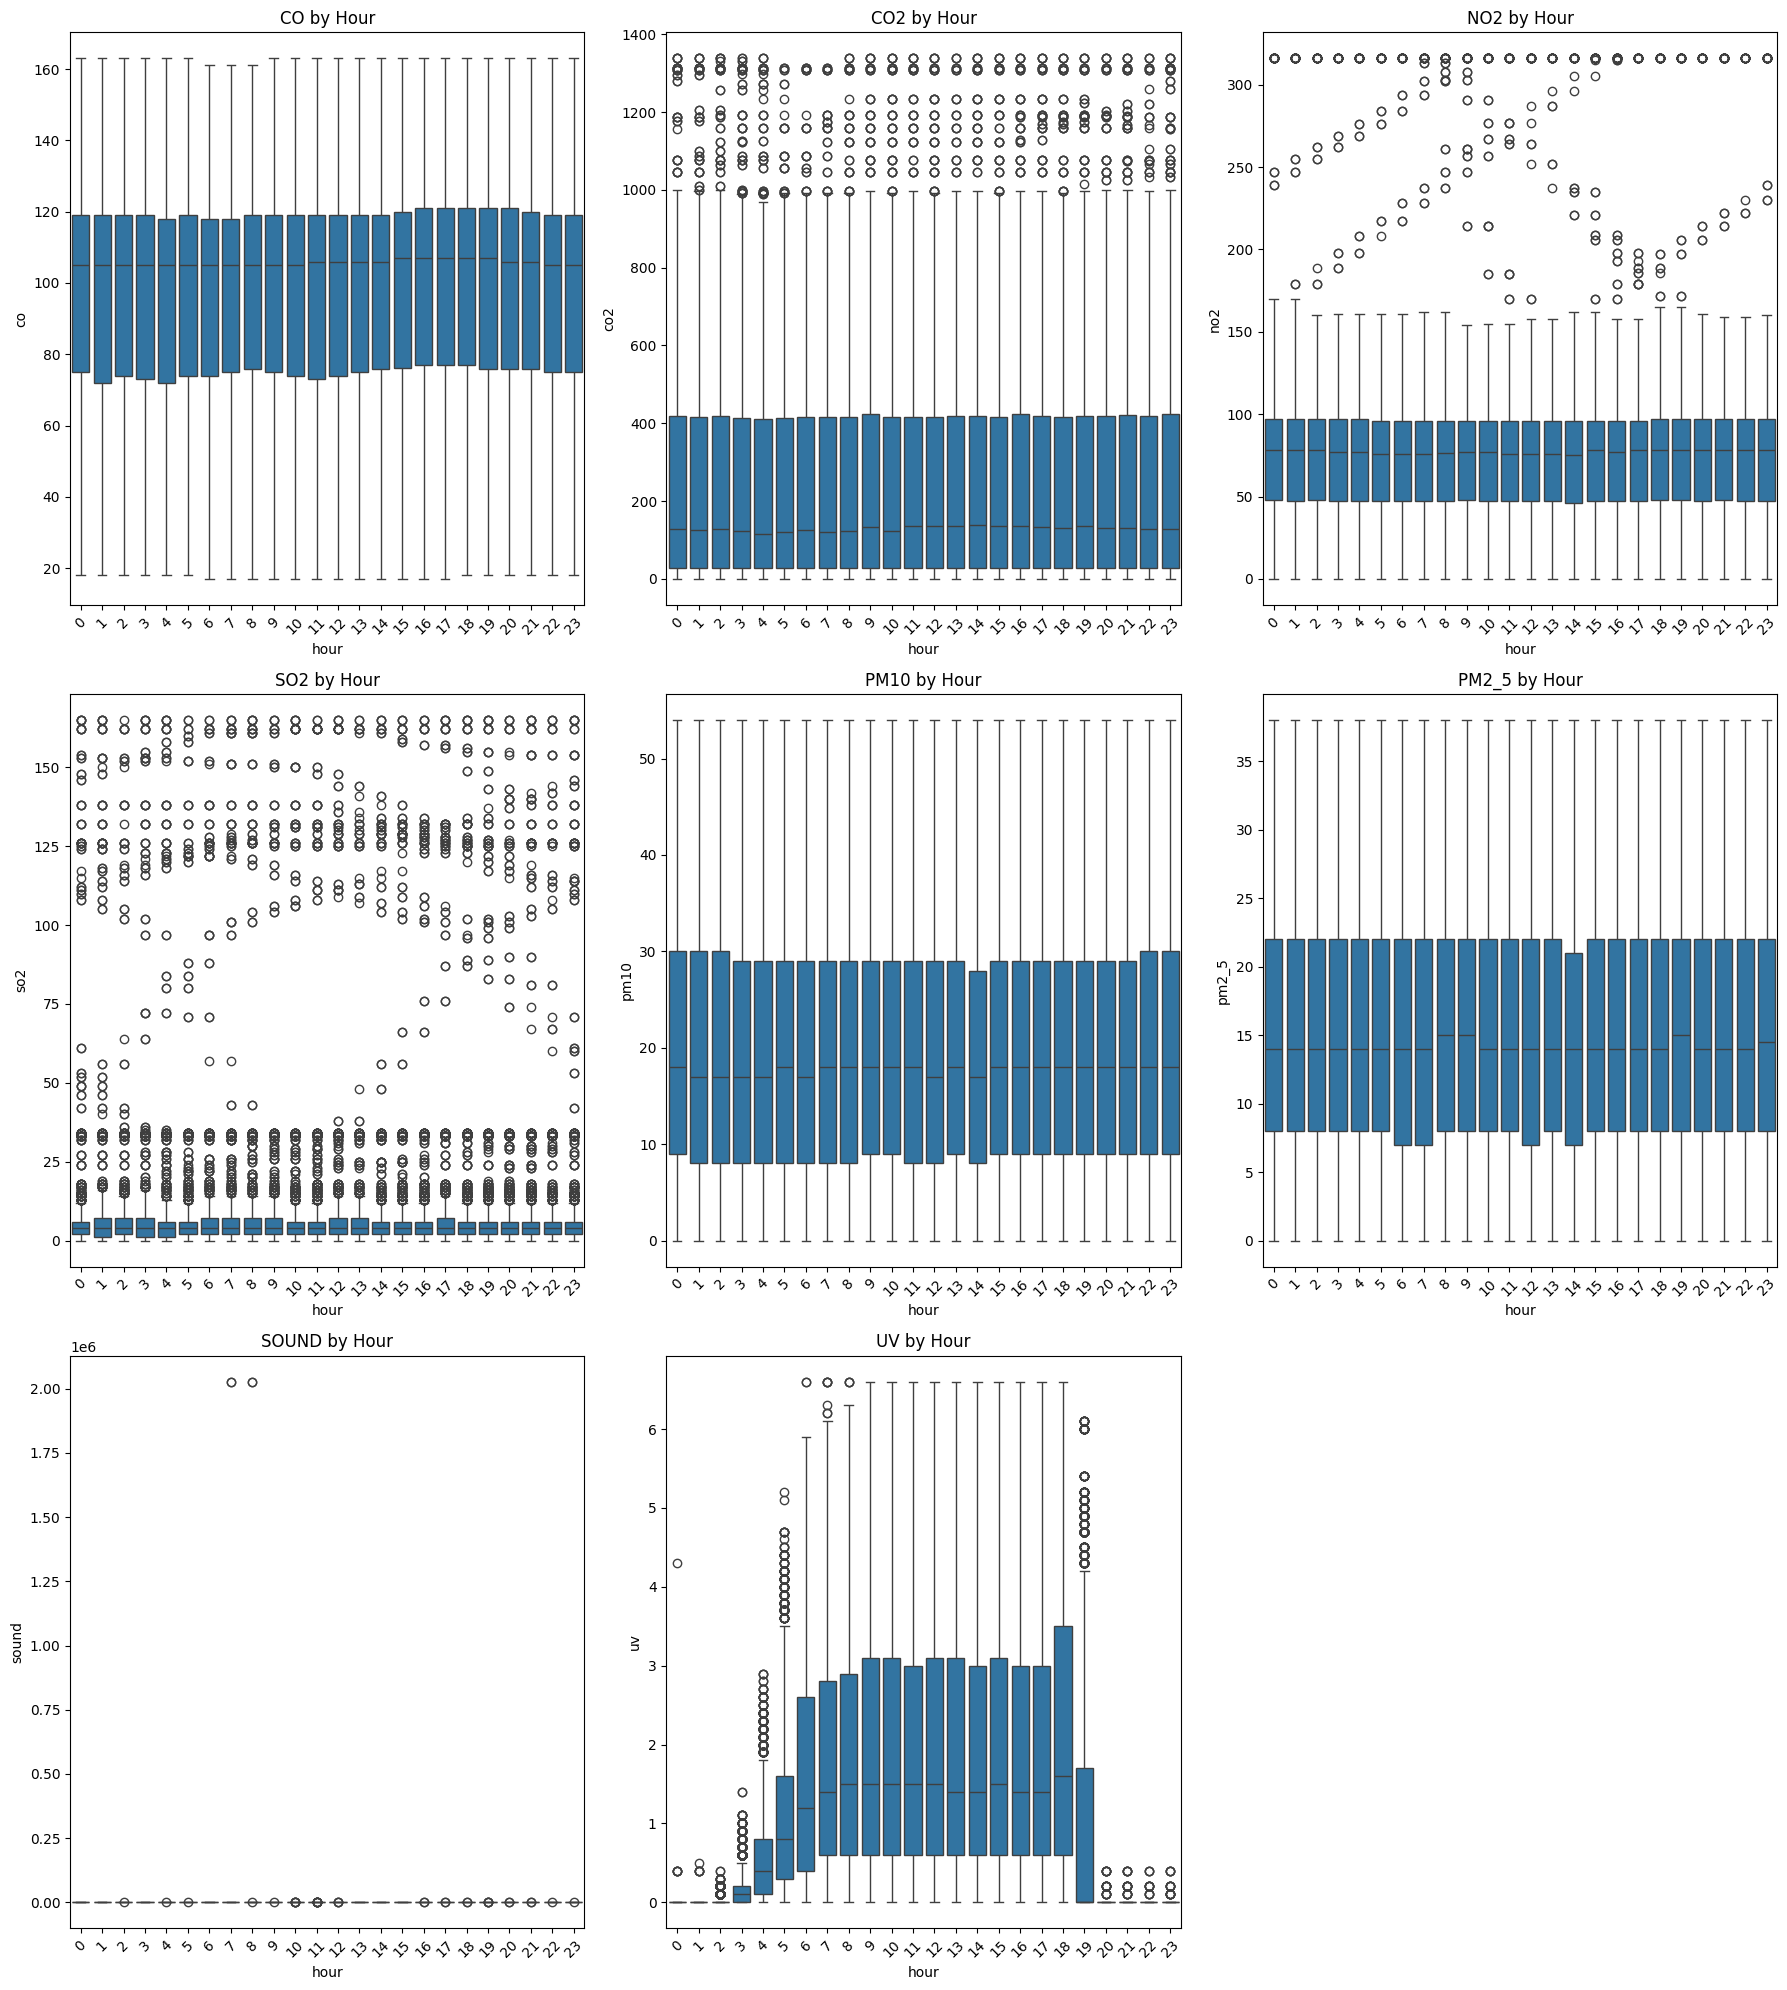

In [16]:
# boxplots for pollutants by hour

plt.figure(figsize=(18,20))
for i, col in enumerate(pollution_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=pollution_df, x="hour", y = col)
    plt.title(f'{col.upper()} by Hour')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

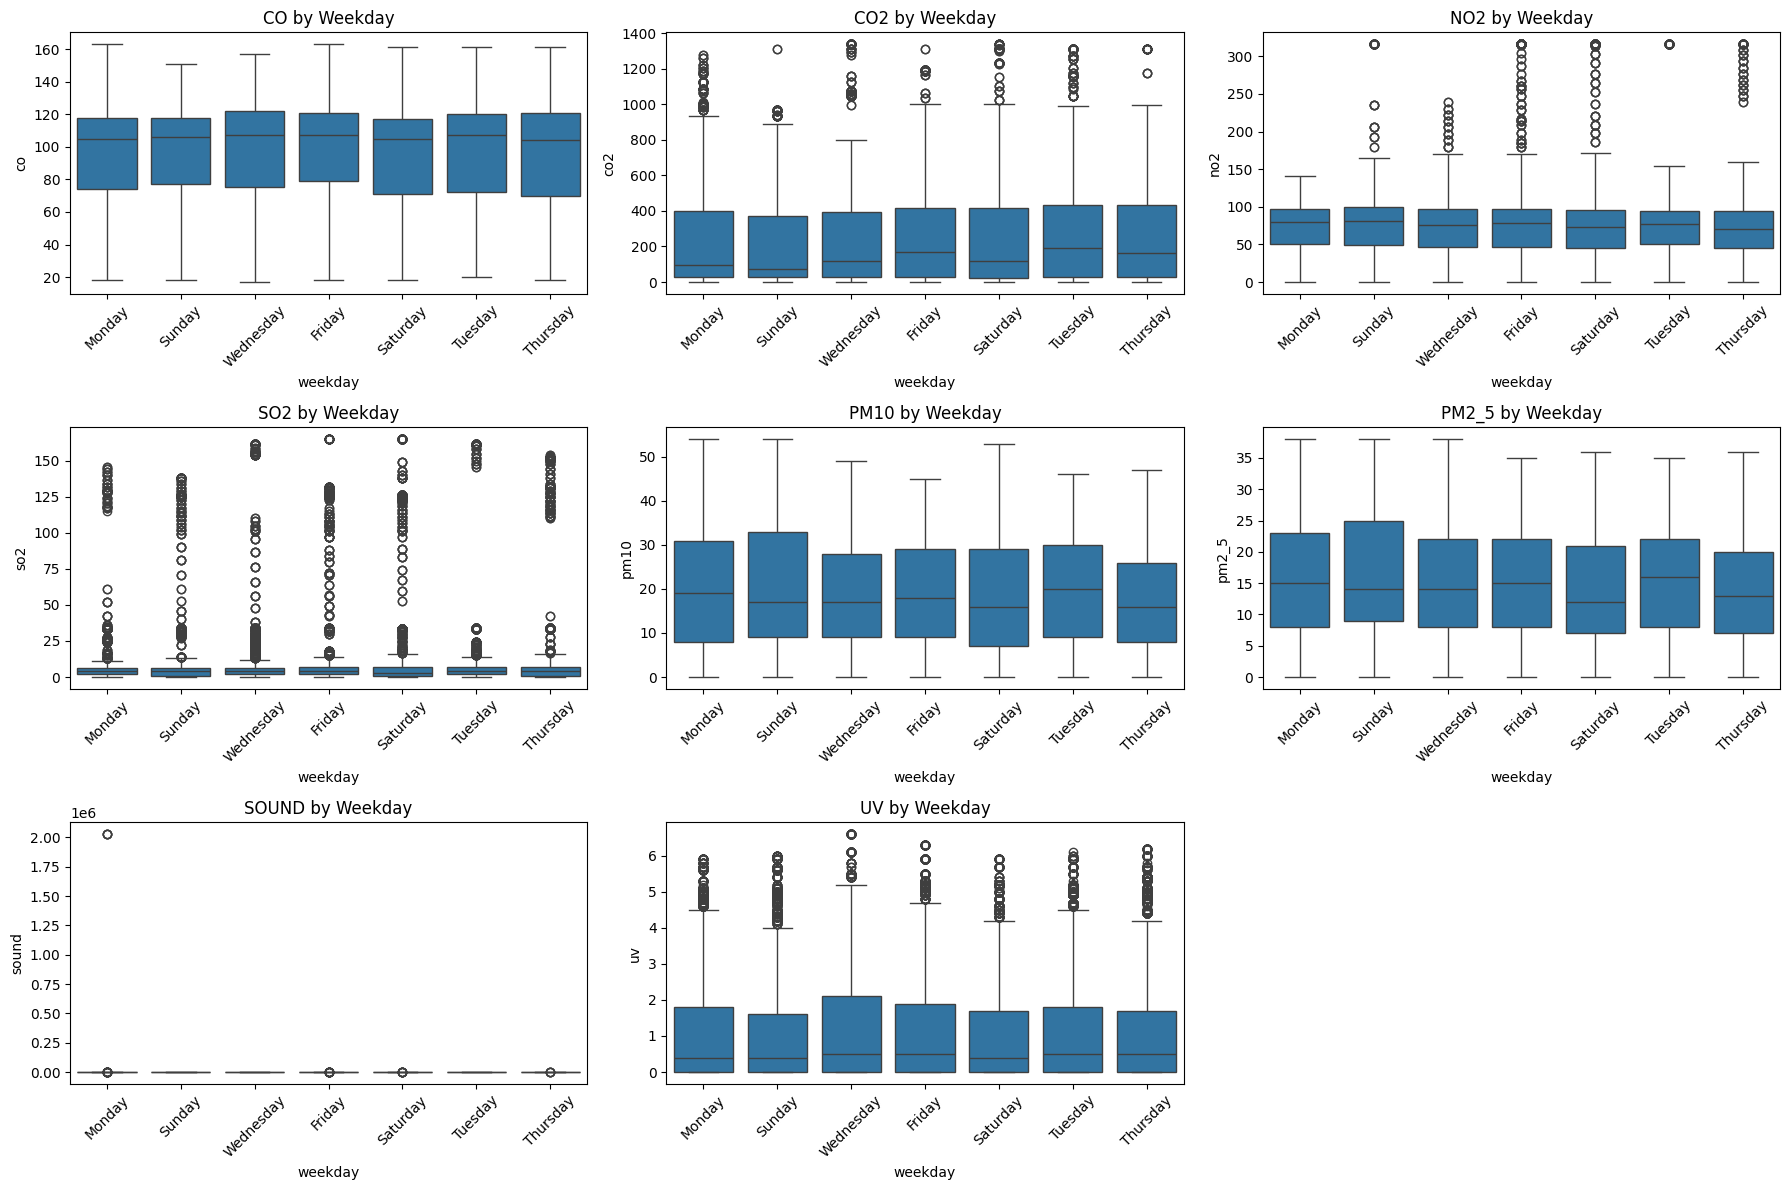

In [17]:
# Boxplots of pollutants by weekday
plt.figure(figsize=(18, 12))
for i, col in enumerate(pollution_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=pollution_df, x='weekday', y=col)
    plt.title(f'{col.upper()} by Weekday')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


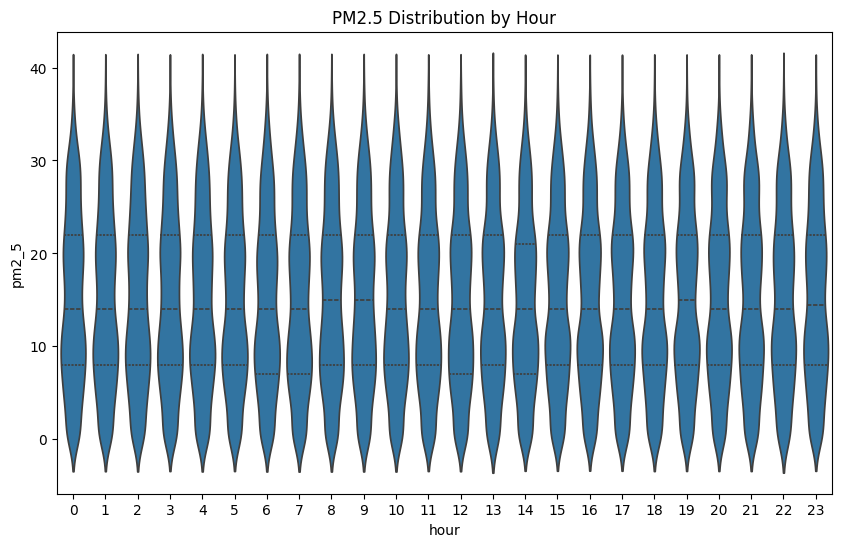

In [18]:
# violin plot for PM2.5 across hours
plt.figure(figsize=(10, 6))
sns.violinplot(data=pollution_df, x='hour', y='pm2_5', inner='quart')
plt.title('PM2.5 Distribution by Hour')
plt.show()


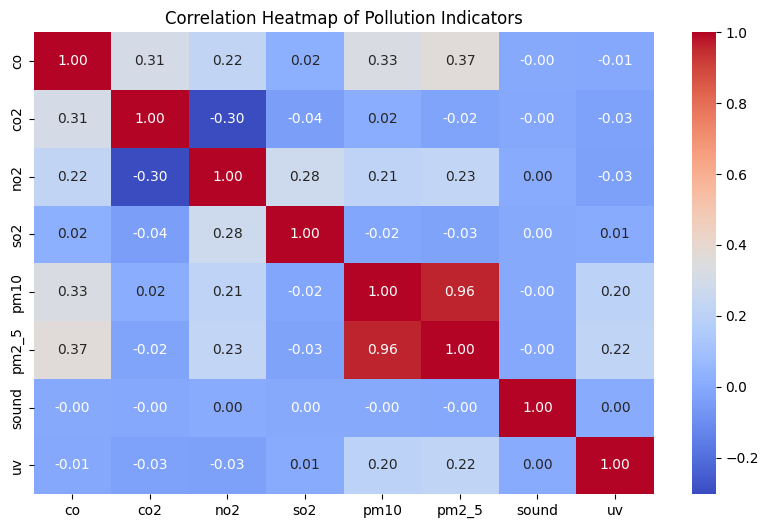

In [19]:
# heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(pollution_df[pollution_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Pollution Indicators")
plt.show()


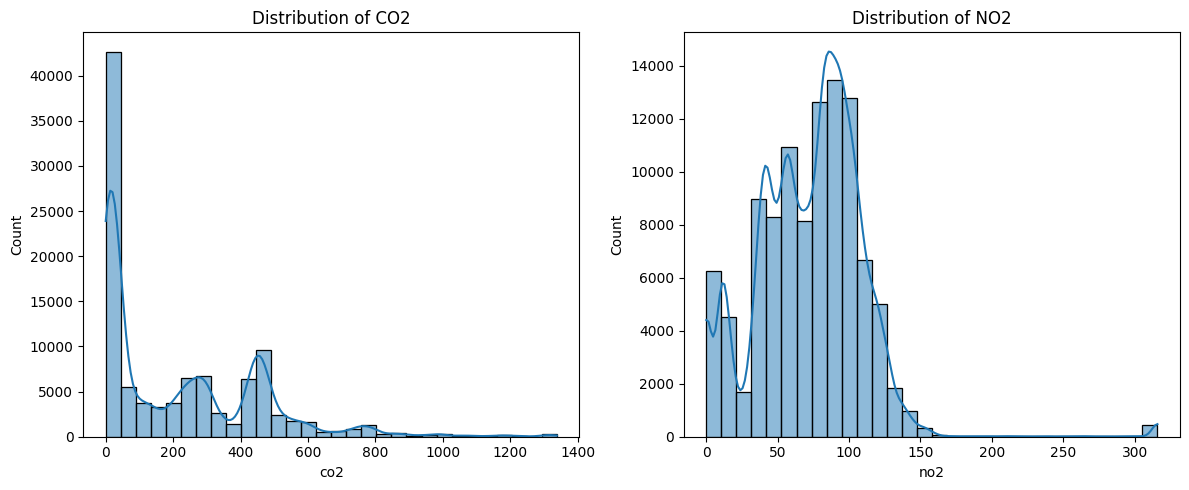

In [20]:
# distribution plots for CO2 and NO2
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(pollution_df['co2'], kde=True, bins=30)
plt.title('Distribution of CO2')

plt.subplot(1, 2, 2)
sns.histplot(pollution_df['no2'], kde=True, bins=30)
plt.title('Distribution of NO2')

plt.tight_layout()
plt.show()


### Rankings

In [21]:
# top 5 hours with highest average total pollution
pollution_df['total_pollution'] = pollution_df[pollution_cols].sum(axis=1)
hourly_avg = pollution_df.groupby('hour')['total_pollution'].mean().sort_values(ascending=False)

print("Top 5 Hours with Highest Average Pollution:")
print(hourly_avg.head())


Top 5 Hours with Highest Average Pollution:
hour
8     1443.303007
7     1439.341142
17     504.372302
16     504.268115
19     503.116674
Name: total_pollution, dtype: float64


In [22]:
# top 5 weekdays with lowest average total pollution
weekday_avg = pollution_df.groupby('weekday')['total_pollution'].mean().sort_values()

print("Top 5 Weekdays with Lowest Average Pollution:")
print(weekday_avg.head())


Top 5 Weekdays with Lowest Average Pollution:
weekday
Sunday       485.125133
Wednesday    493.480309
Saturday     496.492011
Thursday     500.910101
Friday       511.696772
Name: total_pollution, dtype: float64


In [23]:
# rank pollutants by their mean 
mean = pollution_df[pollution_cols].mean().sort_values(ascending=False)
print("Average Pollution Levels (High to Low):")
print(mean)


Average Pollution Levels (High to Low):
co2      218.046025
sound    149.404383
co        96.018623
no2       72.672535
pm10      18.964624
pm2_5     14.999845
so2        5.912378
uv         1.146618
dtype: float64


### **Categorize pollution**

In [24]:
# outlier detection for each pollutant
for col in pollution_cols:
    Q1 = pollution_df[col].quantile(0.25)
    Q3 = pollution_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = pollution_df[(pollution_df[col] < lower_bound) | (pollution_df[col] > upper_bound)]
    print(f"{col.upper()}: {len(outliers)} outliers detected.")


CO: 0 outliers detected.
CO2: 809 outliers detected.
NO2: 618 outliers detected.
SO2: 4166 outliers detected.
PM10: 0 outliers detected.
PM2_5: 0 outliers detected.
SOUND: 45 outliers detected.
UV: 5298 outliers detected.


In [25]:
# categorise uv levels

def categorize_uv(uv):
    if uv <= 5:
        return "Low"
    elif uv <= 5:
        return "Moderate"
    else:
        return "High"
    
pollution_df['uv_risk'] = pollution_df['uv'].apply(categorize_uv)

print(pollution_df['uv_risk'].value_counts())

uv_risk
Low     100796
High      2409
Name: count, dtype: int64


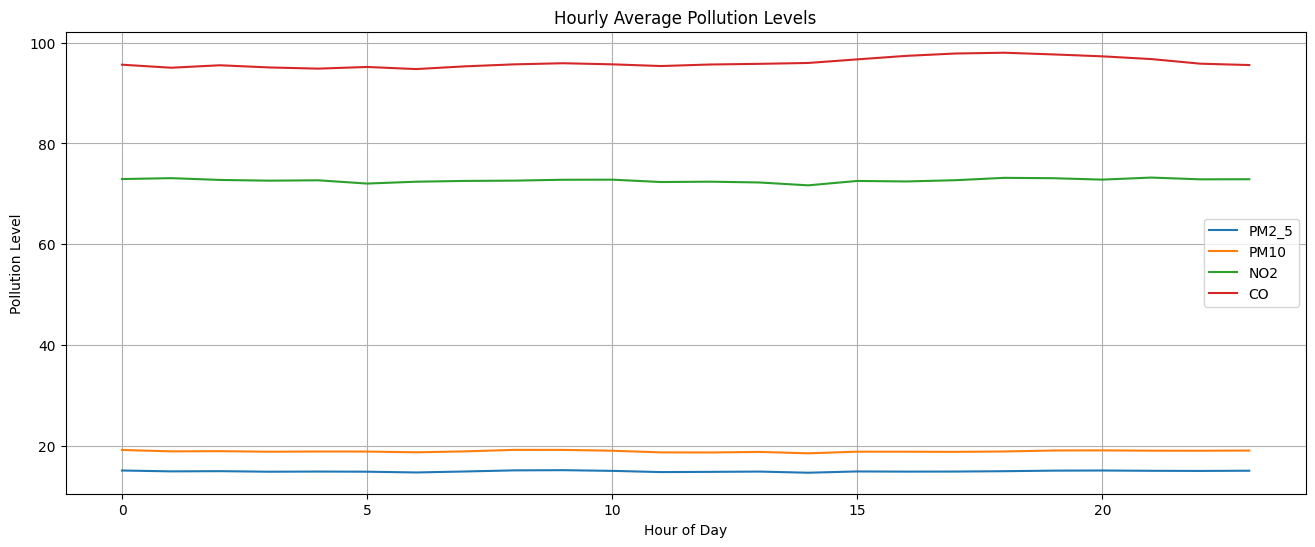

In [26]:

# hourly average pollution lineplot
hourly_avg = pollution_df.groupby('hour')[pollution_cols].mean()

plt.figure(figsize=(16, 6))
for col in ['pm2_5', 'pm10', 'no2', 'co']:
    plt.plot(hourly_avg.index, hourly_avg[col], label=col.upper())

plt.title("Hourly Average Pollution Levels")
plt.xlabel("Hour of Day")
plt.ylabel("Pollution Level")
plt.legend()
plt.grid(True)
plt.show()


### **hourly pollution trend analysis**

- **PM2.5 and PM10** levels remain relatively **stable throughout the day**, with only **minor fluctuations** across different hours.
- **NO₂** concentrations show a **consistent trend** without notable hourly peaks or dips.
- **CO** levels exhibit a **slight increase in the late afternoon and evening**, but the change is **not significant**.
- There are **no sharp hourly spikes** in any pollutant, suggesting **minimal variation based on time of day**.
- These patterns imply that pollution levels are likely driven by **constant background sources** (e.g., environment, industry) rather than **time-bound activities** like rush hour traffic.



###  **summary**

This beginner-friendly EDA explored pollution trends in Pune using timestamped environmental sensor data. We performed data cleaning, visualizations, summary statistics, outlier detection, and simple categorizations to better understand air quality variations by hour and weekday.


In [28]:
# Save the cleaned dataframe
df.to_csv("cleaned_pune_pollution_data.csv", index=False)
print("Cleaned dataset exported successfully.")

Cleaned dataset exported successfully.
